In [1]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import wrangle
import explore
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set the Seaborn style to "darkgrid" for better visual contrast and readability
sns.set_style("darkgrid")
# Set the Matplotlib style to "dark_background" for a visually appealing dark theme
plt.style.use('dark_background')
# Configure the default float format in Pandas to display two decimal places
pd.options.display.float_format = '{:20,.2f}'.format
# Set the maximum column width in Pandas to display the entire content without truncation
pd.set_option('display.max_colwidth', None)
# Set the display width in Pandas to match the terminal/console width
pd.set_option('display.width', None)
# Reset the column header justification in Pandas to its default (left-aligned)
pd.reset_option("colheader_justify", 'right')

In [4]:
# Acquire Data
df, train, validate, test = wrangle.wrangle_data()

Opening data from local file.


In [ ]:
df = wrangle.k_means_clustering(k=4)

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,...,sub_category_Shorts,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded
0,2016-02-19,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,...,0,0,1,0,0,0,0,0,1,0
1,2016-02-20,2016,February,29,F,United States,Washington,Clothing,Gloves,2,...,0,0,0,0,0,0,0,0,1,2
2,2016-02-27,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,1,0,0,0,0,0,1,0
3,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,...,0,0,1,0,0,0,0,0,1,0
4,2016-03-12,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,2015,March,38,M,France,Charente-Maritime,Bikes,Mountain Bikes,1,...,0,0,0,0,0,1,0,0,0,1
34862,2016-02-07,2016,February,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,2,...,0,0,0,0,0,1,0,0,0,1
34863,2015-03-13,2015,March,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,1,...,0,0,0,0,0,1,0,0,0,1
34864,2015-04-05,2015,April,38,M,France,Hauts de Seine,Bikes,Mountain Bikes,3,...,0,0,0,0,0,1,0,0,0,1


In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def perform_clustering(df):
    """
    Perform clustering on the input DataFrame using t-SNE for dimensionality reduction.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.

    Returns:
        pandas.DataFrame: DataFrame with an additional 'cluster' column.
    """

    # Encode categorical columns
    le = LabelEncoder()
    df['customer_gender'] = le.fit_transform(df['customer_gender'])
    df['country'] = le.fit_transform(df['country'])
    df['state'] = le.fit_transform(df['state'])
    df['product_category'] = le.fit_transform(df['product_category'])
    df['sub_category'] = le.fit_transform(df['sub_category'])
    df['month'] = le.fit_transform(df['month'])

    # Feature Selection
    data = df[['customer_age', 'sub_category', 'revenue']]  # Select relevant columns

    # Standardization
    scaler = StandardScaler()
    X = scaler.fit_transform(data)

    # Clustering Algorithm (K-means)
    k = 4  # Number of clusters
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)

    # Add 'cluster' column to the DataFrame
    df['cluster'] = labels

    return df

In [9]:
def calculate_cluster_means(df, label):
    """
    Calculate the mean values of the selected features for each cluster.

    Parameters:
        df (pandas.DataFrame): DataFrame with the 'cluster' column.
        label (numpy.array): Cluster labels.

    Returns:
        None
    """
    k = len(np.unique(label))  # Get the number of clusters

    for cluster in range(k):  # Iterate over each cluster
        cluster_data = df[label == cluster]  # Select data points belonging to the current cluster
        cluster_mean = cluster_data.mean(axis=0)  # Calculate the mean values for each feature in the cluster
        print(f"Cluster {cluster + 1} Mean:")  # Print the cluster number
        print(cluster_mean)  # Print the mean values
        print()  # Print a new line for readability

# Perform clustering
clustered_df = perform_clustering(df)

# Extract necessary variables for plotting
label = clustered_df['cluster']

In [11]:
calculate_cluster_means(df, label)

Cluster 1 Mean:
year                                         2,015.53
month                                            5.44
customer_age                                    28.42
customer_gender                                  0.52
country                                          2.00
state                                           17.50
product_category                                 0.46
sub_category                                    12.74
quantity                                         2.00
unit_cost                                      230.76
unit_price                                     257.96
cost                                           377.75
revenue                                        422.31
profit                                          44.56
sub_category_Bike Stands                         0.00
sub_category_Bottles and Cages                   0.00
sub_category_Caps                                0.00
sub_category_Cleaners                            0.00
sub_category

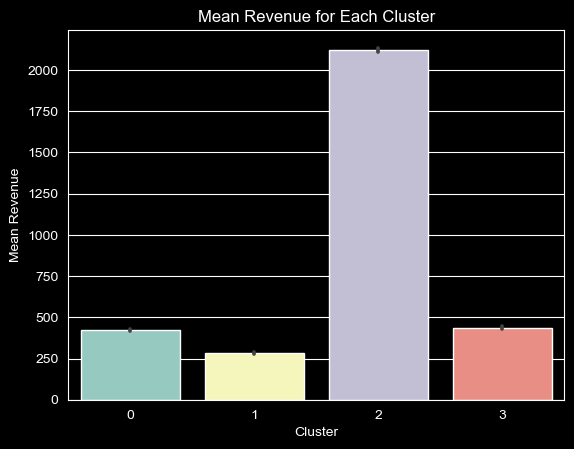

In [10]:
explore.plot_mean_revenue(clustered_df, label)

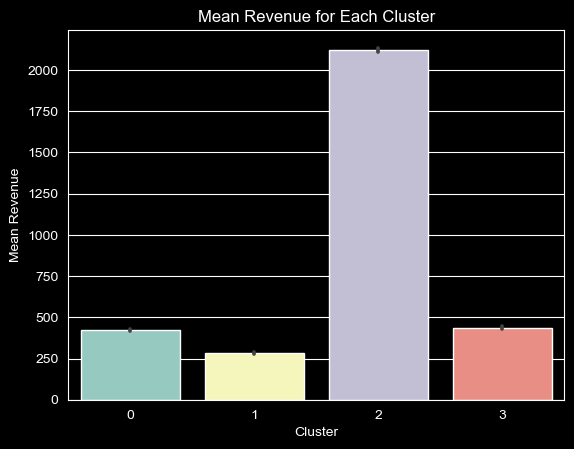

In [15]:
explore.plot_mean_revenue(clustered_df, label)

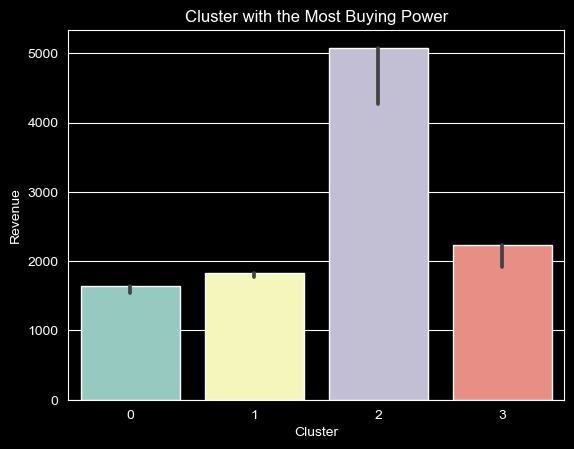

In [16]:
explore.most_buying_power(label, clustered_df['revenue'])

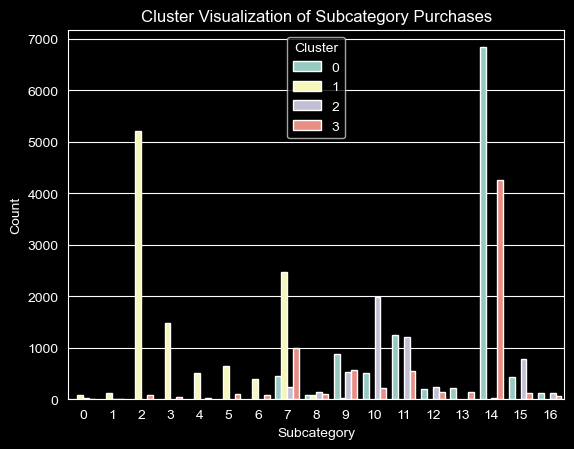

In [17]:
explore.popular_subcategory_purchases(label, clustered_df)

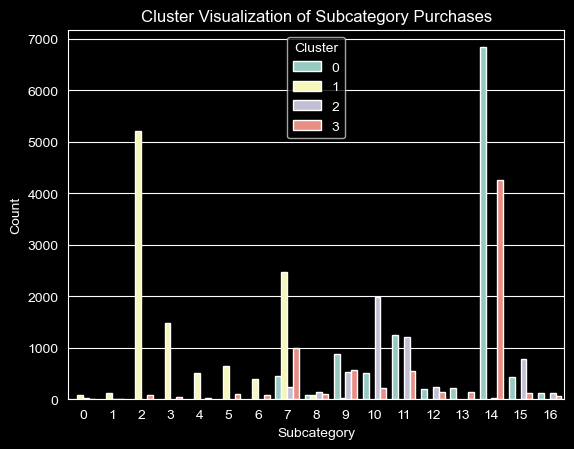

In [18]:
explore.popular_subcategory_purchases(label, clustered_df)

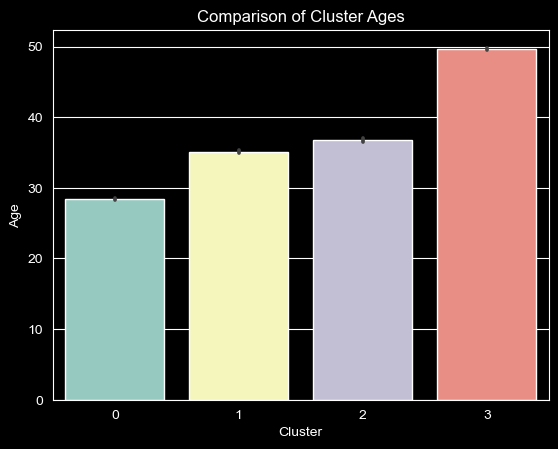

In [19]:
explore.ages_by_cluster(label, clustered_df['customer_age'])

In [21]:
df = wrangle.k_means_clustering(k=4)

Opening data from local file.
Cluster 1 Mean:
customer_age                                    28.11
sub_category_Bike Stands                         0.00
sub_category_Bottles and Cages                   0.25
sub_category_Caps                                0.08
sub_category_Cleaners                            0.02
sub_category_Fenders                             0.02
sub_category_Gloves                              0.01
sub_category_Helmets                             0.05
sub_category_Hydration Packs                     0.00
sub_category_Jerseys                             0.02
sub_category_Mountain Bikes                      0.00
sub_category_Road Bikes                          0.00
sub_category_Shorts                              0.01
sub_category_Socks                               0.02
sub_category_Tires and Tubes                     0.50
sub_category_Touring Bikes                       0.00
sub_category_Vests                               0.00
revenue                             

In [22]:
train, test, validate = wrangle.clean_split_df(df) 

In [23]:
train

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
31768,2015-12-25,2015,December,22,F,United States,California,Accessories,Tires and Tubes,1,175.00,191.00,175.00,191.00,16.00,0
15069,2016-02-24,2016,February,42,F,France,Yveline,Bikes,Road Bikes,2,850.50,"1,037.50","1,701.00","2,075.00",374.00,3
26187,2016-03-08,2016,March,31,M,France,Seine (Paris),Accessories,Helmets,2,192.50,160.50,385.00,321.00,-64.00,2
13139,2016-02-18,2016,February,28,M,United States,California,Clothing,Caps,2,67.50,97.00,135.00,194.00,59.00,0
16041,2015-08-01,2015,August,21,F,United States,California,Accessories,Bottles and Cages,1,10.00,12.00,10.00,12.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-10-07,2015,October,31,F,United States,California,Clothing,Jerseys,1,"1,080.00","1,130.00","1,080.00","1,130.00",50.00,2
20070,2016-01-18,2016,January,32,M,United States,Washington,Accessories,Bottles and Cages,2,32.50,42.00,65.00,84.00,19.00,0
28560,2016-07-17,2016,July,61,F,Germany,Saarland,Accessories,Tires and Tubes,3,35.67,56.00,107.00,168.00,61.00,1
5564,2015-09-10,2015,September,33,F,United Kingdom,England,Accessories,Bottles and Cages,2,35.00,41.50,70.00,83.00,13.00,0


In [24]:
df1 = train

In [25]:
df1

,date,year,month,customer_age,customer_gender,country,state,product_category,sub_category,quantity,unit_cost,unit_price,cost,revenue,profit,clusters
31768,2015-12-25,2015,December,22,F,United States,California,Accessories,Tires and Tubes,1,175.00,191.00,175.00,191.00,16.00,0
15069,2016-02-24,2016,February,42,F,France,Yveline,Bikes,Road Bikes,2,850.50,"1,037.50","1,701.00","2,075.00",374.00,3
26187,2016-03-08,2016,March,31,M,France,Seine (Paris),Accessories,Helmets,2,192.50,160.50,385.00,321.00,-64.00,2
13139,2016-02-18,2016,February,28,M,United States,California,Clothing,Caps,2,67.50,97.00,135.00,194.00,59.00,0
16041,2015-08-01,2015,August,21,F,United States,California,Accessories,Bottles and Cages,1,10.00,12.00,10.00,12.00,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-10-07,2015,October,31,F,United States,California,Clothing,Jerseys,1,"1,080.00","1,130.00","1,080.00","1,130.00",50.00,2
20070,2016-01-18,2016,January,32,M,United States,Washington,Accessories,Bottles and Cages,2,32.50,42.00,65.00,84.00,19.00,0
28560,2016-07-17,2016,July,61,F,Germany,Saarland,Accessories,Tires and Tubes,3,35.67,56.00,107.00,168.00,61.00,1
5564,2015-09-10,2015,September,33,F,United Kingdom,England,Accessories,Bottles and Cages,2,35.00,41.50,70.00,83.00,13.00,0


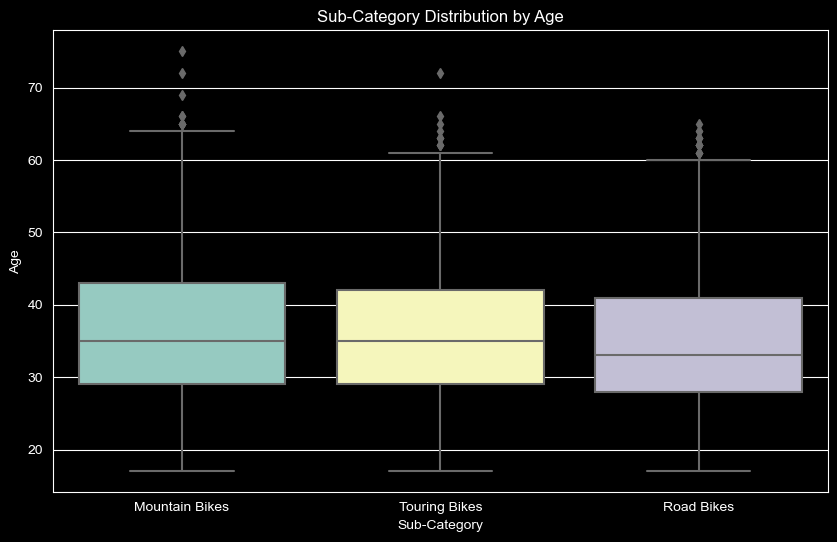

In [26]:
explore.visualize_subcategory_age(df)

<Figure size 1000x600 with 0 Axes>

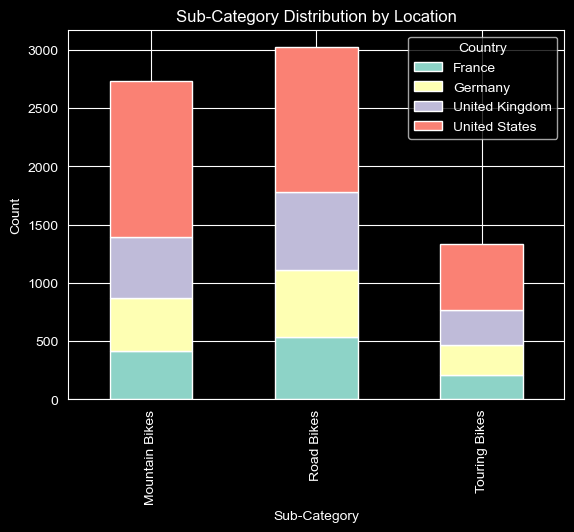

In [27]:
explore.visualize_subcategory_location(df)

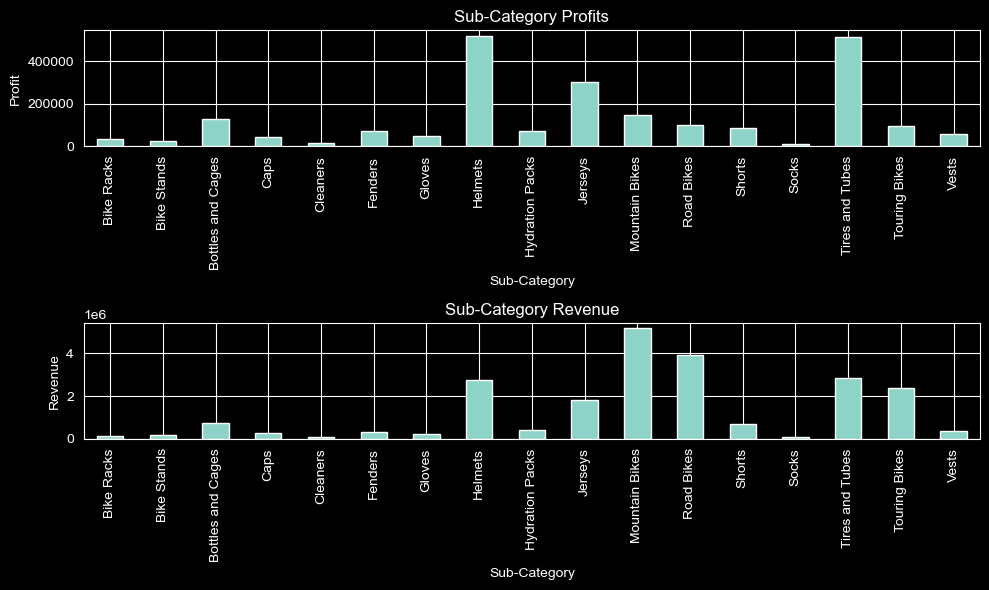

In [28]:
explore.visualize_subcategory_profit_revenue(df)

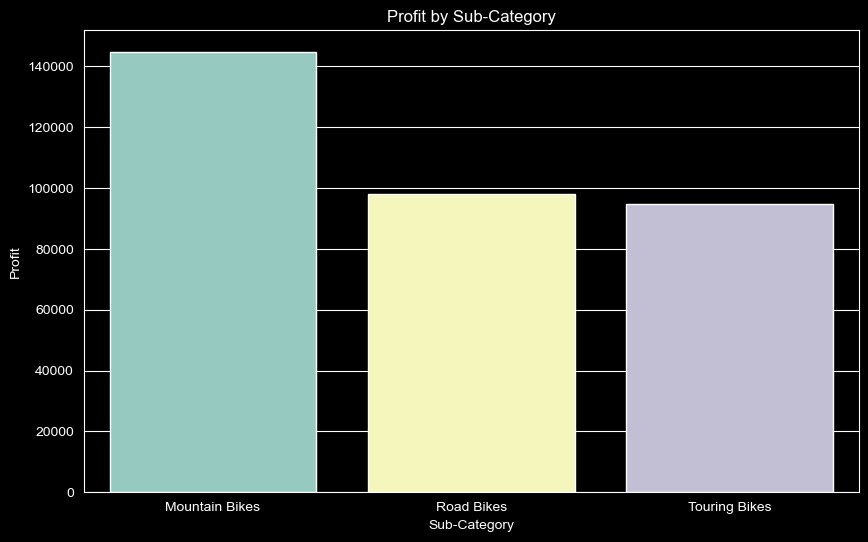

In [29]:
explore.visualize_subcategory_profit(df)

<Figure size 1000x600 with 0 Axes>

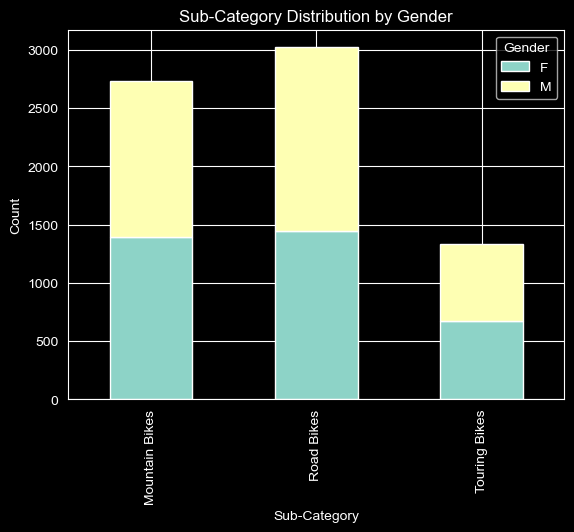

In [30]:
explore.visualize_subcategory_gender(df)

In [31]:
explore.analyze_distributions(df)

,year,customer_age,quantity,unit_cost,unit_price,cost,revenue,profit,sub_category_Bike Stands,sub_category_Bottles and Cages,...,sub_category_Socks,sub_category_Tires and Tubes,sub_category_Touring Bikes,sub_category_Vests,customer_gender_M,country_Germany,country_United Kingdom,country_United States,product_category_encoded,clusters
count,"34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00",...,"34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00","34,866.00"
mean,"2,015.57",36.38,2.00,349.88,389.23,576.00,640.87,64.87,0.00,0.15,...,0.01,0.32,0.04,0.01,0.51,0.15,0.18,0.52,0.50,1.12
std,0.50,11.11,0.81,490.02,525.32,690.50,736.65,152.88,0.06,0.36,...,0.10,0.47,0.19,0.09,0.50,0.36,0.39,0.50,0.74,1.03
min,"2,015.00",17.00,1.00,0.67,0.67,2.00,2.00,-937.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,015.00",28.00,1.00,45.00,53.67,85.00,102.00,5.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,016.00",35.00,2.00,150.00,179.00,261.00,319.00,27.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
75%,"2,016.00",44.00,3.00,455.00,521.00,769.00,902.00,96.00,0.00,0.00,...,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,2.00
max,"2,016.00",87.00,3.00,"3,240.00","5,082.00","3,600.00","5,082.00","1,842.00",1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,3.00


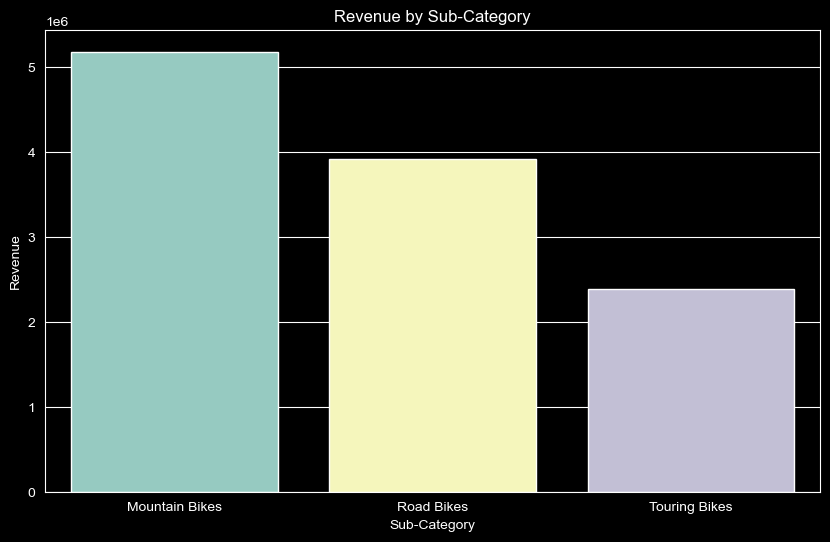

In [32]:
explore.visualize_subcategory_revenue(df)

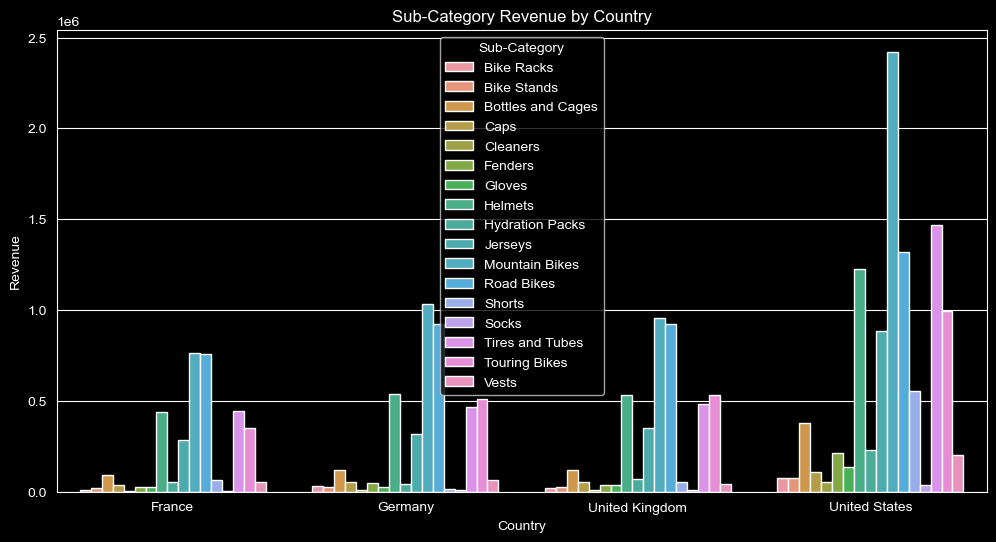

In [33]:
explore.visualize_subcategory_country(df)

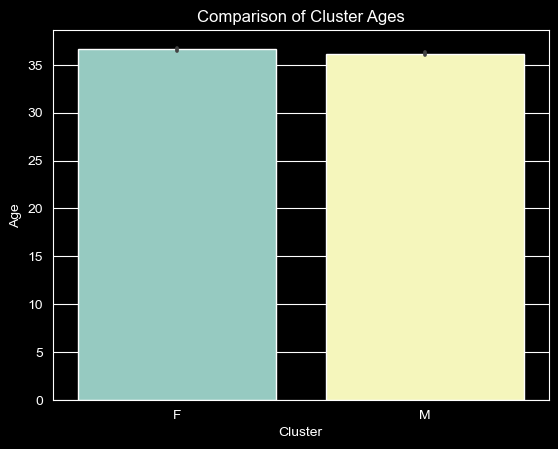

In [34]:
explore.visualize_gender_age(df)

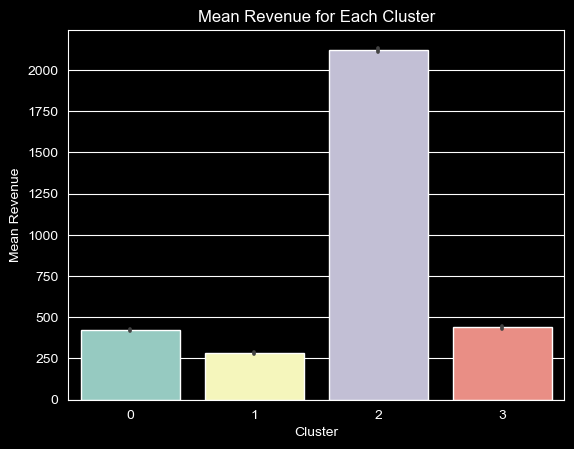

In [35]:
explore.plot_mean_revenue(df, label)